In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import csv

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  

import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Adjusting the configuration of the plots we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Reading Data from local system

df = pd.read_csv(r'C:\Users\Aakash\Desktop\JupyterNotebook\Movies_Data_Analysis\movies.csv\movies.csv')
#pd.set_option('display.max_rows',None)

In [3]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
#checking missing data

for col in df.columns:
    data_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(data_missing,1)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
#checking data types of all columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#changing data types of particular column
   
df['budget'] = df['budget'].fillna(0)   # .fillna(0) => using for filling null values as 0 and then convert into int data type
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0)
df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].fillna(0)
df['votes'] = df['votes'].astype('int64')

In [7]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [12]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,NaN,86.0
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0


In [9]:
#Removing Duplicates values

df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)
#df.drop_duplicates()
df.company

0             Warner Bros.
1        Columbia Pictures
2                Lucasfilm
3       Paramount Pictures
4           Orion Pictures
               ...        
7663                   NaN
7664                   NaN
7665      Embi Productions
7666                   NaN
7667           PK 65 Films
Name: company, Length: 7668, dtype: object

In [10]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


# Finding Correlation

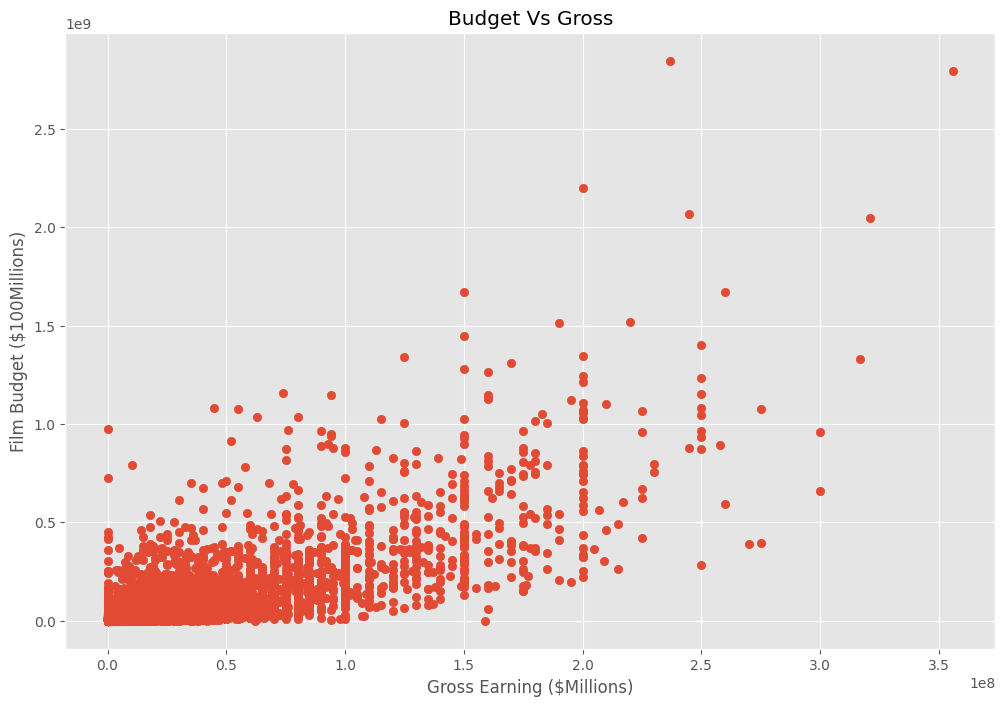

In [16]:
#Assumption for Budget and Company have high correlation
#checking correlation

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross')

plt.xlabel('Gross Earning ($Millions)')

plt.ylabel('Film Budget ($100Millions)')

plt.show()


<Axes: xlabel='budget', ylabel='gross'>

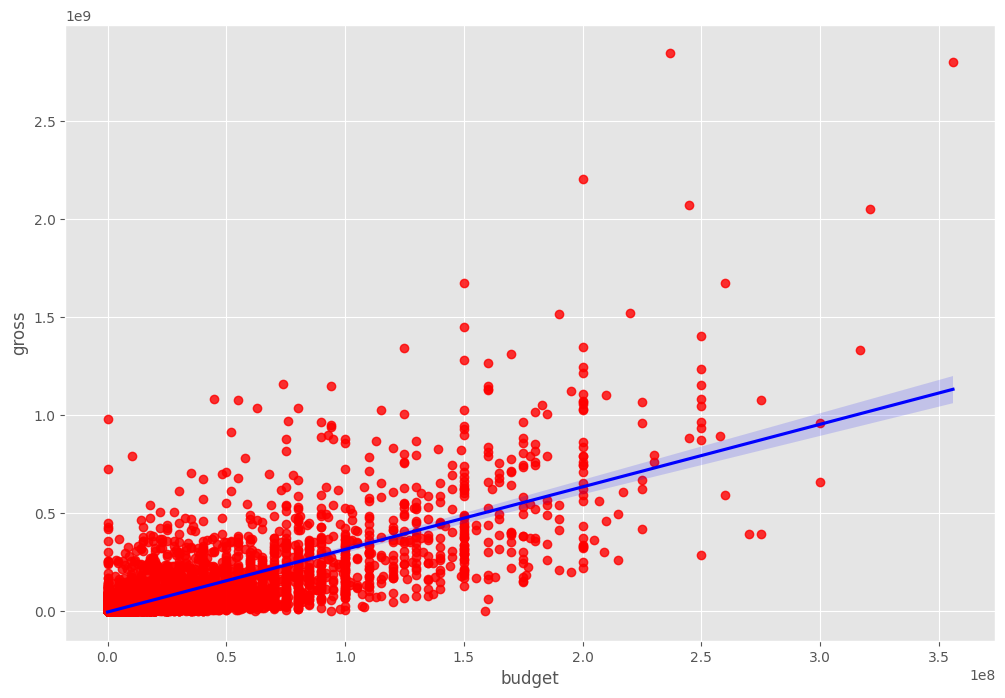

In [18]:
#Plotting Budget Vs Gross using SEABORN 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [23]:
#Checking correlation by default method and other methods also

df.corr(method = 'pearson')

ValueError: could not convert string to float: 'Avatar'

In [24]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

ValueError: could not convert string to float: 'Avatar'

In [25]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.303745,0.138317,0.253921,0.654832,0.107069,0.599143,0.720206,0.782921,0.652825,0.190572,0.111227,0.978147,0.544947,0.071772
rating,0.303745,1.000000,-0.012156,0.037943,0.236984,-0.065634,0.116255,0.234942,0.255798,0.243496,0.158906,0.087155,0.310789,0.214204,0.033178
genre,0.138317,-0.012156,1.000000,0.087977,0.091329,0.063222,0.146635,0.093376,0.088079,0.097914,-0.073897,0.101278,0.134001,0.053239,0.005608
year,0.253921,0.037943,0.087977,1.000000,0.315993,0.076737,0.328878,0.173213,0.212338,0.227650,-0.053654,0.060282,0.266957,0.091755,0.032915
released,0.654832,0.236984,0.091329,0.315993,1.000000,0.069264,0.452661,0.502941,0.547946,0.476295,0.162032,0.081272,0.668367,0.382262,0.048271
score,0.107069,-0.065634,0.063222,0.076737,0.069264,1.000000,0.230406,0.149685,0.103889,0.106368,-0.098455,0.001150,0.113338,0.017756,0.035619
votes,0.599143,0.116255,0.146635,0.328878,0.452661,0.230406,1.000000,0.497432,0.525194,0.456481,0.050015,0.043017,0.615094,0.314889,0.068696
director,0.720206,0.234942,0.093376,0.173213,0.502941,0.149685,0.497432,1.000000,0.695986,0.580123,0.197069,0.043545,0.737284,0.497714,0.080077
writer,0.782921,0.255798,0.088079,0.212338,0.547946,0.103889,0.525194,0.695986,1.000000,0.590050,0.201840,0.064290,0.797703,0.501101,0.057707
star,0.652825,0.243496,0.097914,0.227650,0.476295,0.106368,0.456481,0.580123,0.590050,1.000000,0.221159,0.064879,0.669416,0.480059,0.072482


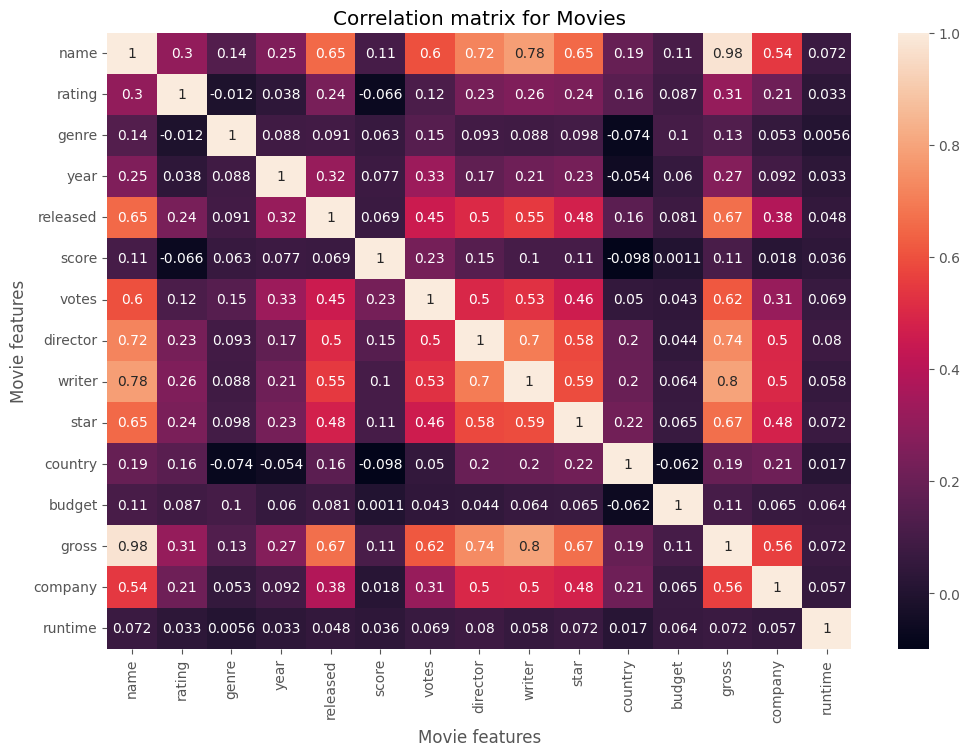

In [26]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.303745
         genre       0.138317
         year        0.253921
         released    0.654832
                       ...   
runtime  country     0.017465
         budget      0.063811
         gross       0.072440
         company     0.057195
         runtime     1.000000
Length: 225, dtype: float64


In [28]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country  score     -0.098455
score    country   -0.098455
country  genre     -0.073897
genre    country   -0.073897
score    rating    -0.065634
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [29]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   writer      0.501101
writer    company     0.501101
released  director    0.502941
director  released    0.502941
writer    votes       0.525194
votes     writer      0.525194
name      company     0.544947
company   name        0.544947
released  writer      0.547946
writer    released    0.547946
company   gross       0.559599
gross     company     0.559599
director  star        0.580123
star      director    0.580123
writer    star        0.590050
star      writer      0.590050
votes     name        0.599143
name      votes       0.599143
votes     gross       0.615094
gross     votes       0.615094
star      name        0.652825
name      star        0.652825
          released    0.654832
released  name        0.654832
gross     released    0.668367
released  gross       0.668367
gross     star        0.669416
star      gross       0.669416
writer    director    0.695986
director  writer      0.695986
          name        0.720206
name      director    0.720206
gross   

In [30]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Marvel Studios                                                   1518815515
Illumination Entertainment                                       1159444662
Fairview Entertainment                                            966554929
B24                                                               880681519
Avi Arad Productions                                              856085151
Heyday Films                                                      814044001
Chris Morgan Productions                                          759056935
Jolie Pas                                                         758411779
Coco Cartoon                                                      726264074
Marvel Entertainment                                              714421503
Temple Hill Entertainment                                         711025481
Chernin Entertainment                                             710644566
Beijing Dengfeng International Culture Communications Company     699992512
Alli

In [31]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0,Dece
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,NaN,86.0,Apri
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0,June
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0,Octo


In [32]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [33]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company                                                        year
Marvel Studios                                                 2012    1518815515
Illumination Entertainment                                     2015    1159444662
Fairview Entertainment                                         2016     966554929
B24                                                            2015     880681519
Avi Arad Productions                                           2018     856085151
Heyday Films                                                   2016     814044001
Chris Morgan Productions                                       2019     759056935
Jolie Pas                                                      2014     758411779
Coco Cartoon                                                   2019     726264074
Marvel Entertainment                                           2014     714421503
Temple Hill Entertainment                                      2009     711025481
Chernin Entertainment         

In [34]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Marvel Studios                                                   1518815515
Illumination Entertainment                                       1159444662
Fairview Entertainment                                            966554929
B24                                                               880681519
Avi Arad Productions                                              856085151
Heyday Films                                                      814044001
Chris Morgan Productions                                          759056935
Jolie Pas                                                         758411779
Coco Cartoon                                                      726264074
Marvel Entertainment                                              714421503
Temple Hill Entertainment                                         711025481
Chernin Entertainment                                             710644566
Beijing Dengfeng International Culture Communications Company     699992512
Alli

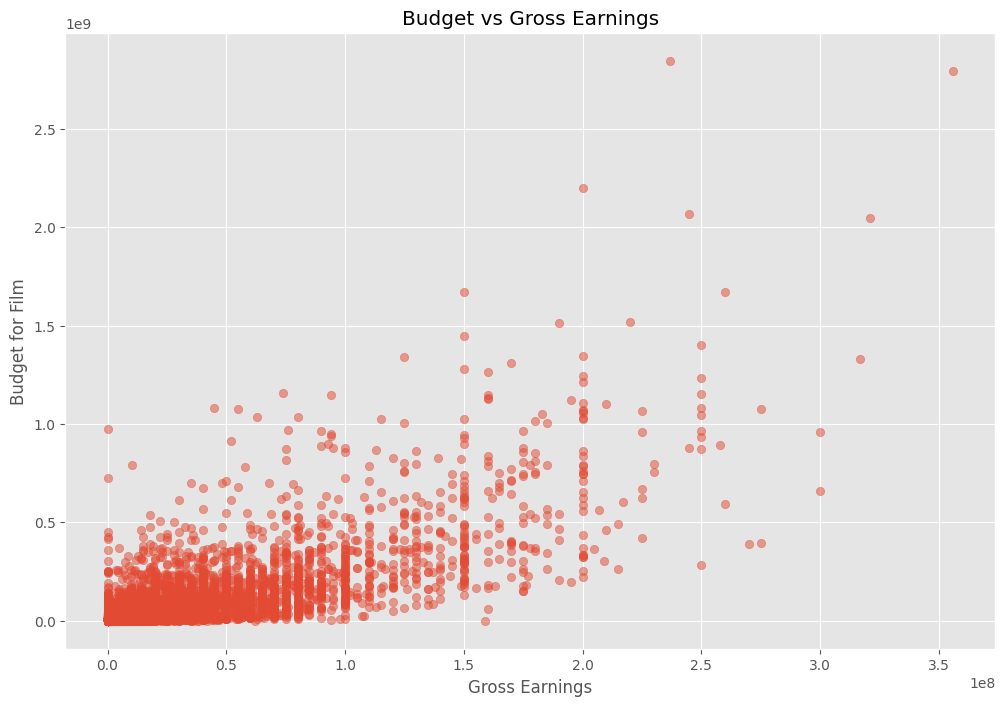

In [35]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [36]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0,Dece
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,NaN,86.0,Apri
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0,June
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0,Octo


In [37]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,-1,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,-1,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,-1,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,-1,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,-1,149.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,7211,6,3,1987,845,6.6,3300,66,3780,701,55,5800000,0,1323,94.0,10
1199,7208,4,4,1987,83,4.8,1400,1877,3645,462,55,0,0,-1,86.0,8
1192,7336,6,10,1987,1754,6.2,2200,745,682,596,54,0,0,1681,110.0,14
1184,1355,6,10,1987,2914,4.0,2100,613,925,1627,55,75000,0,2219,72.0,18


In [38]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.000961,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.018387,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,0.099779,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.038516,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,0.028690,0.000868,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.059243,0.399451,0.040993
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,-0.109944,0.309122,0.017107
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004740,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.002383,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.025543,0.010174,0.015406


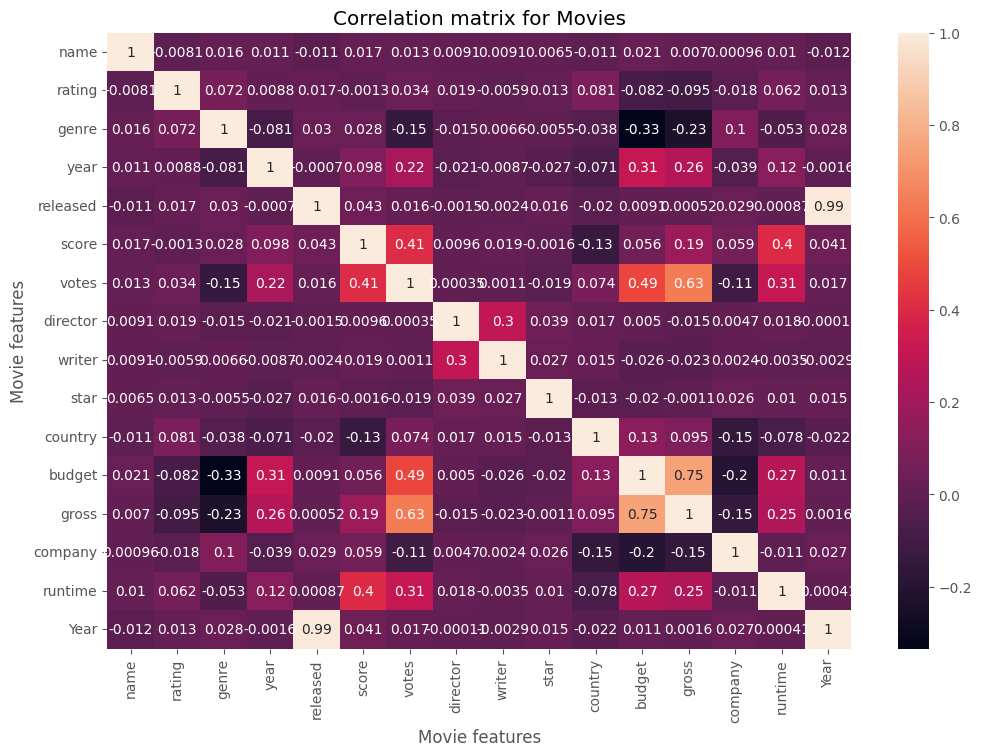

In [39]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [40]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [41]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

NameError: name 'cat_columns' is not defined

<Axes: xlabel='rating', ylabel='gross'>

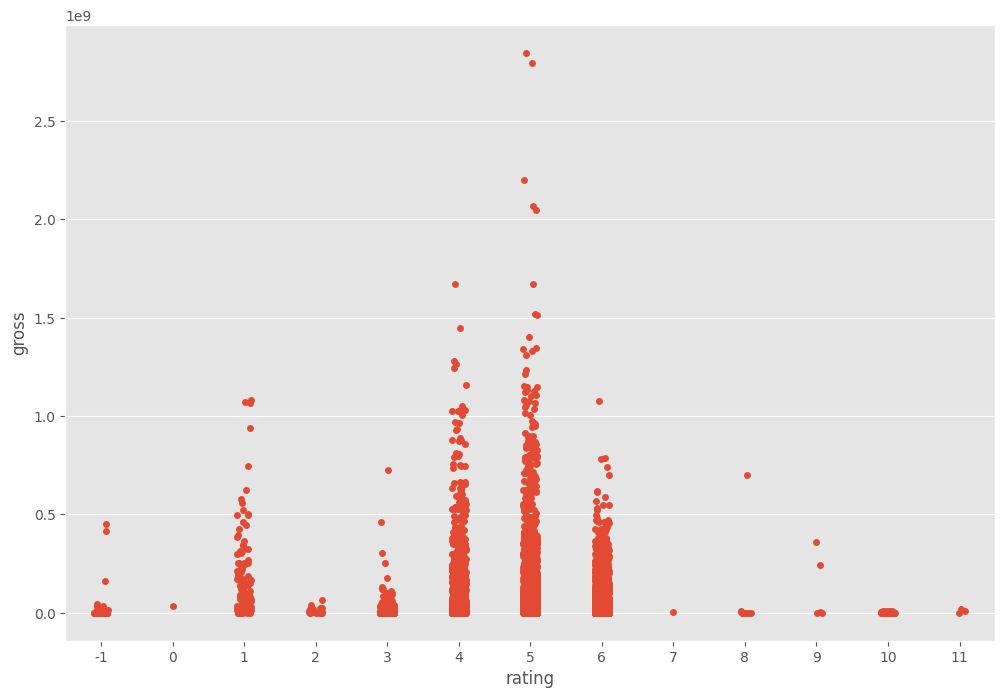

In [42]:
sns.stripplot(x="rating", y="gross", data=df)